# Proyek Predictive Analytics

- **Nama:** Rasyid Naufal
- **Email:** rasyidnaufalsaputra03@gmail.com
- **ID Dicoding:** rasyidnfl


---



# **Predictive Analytics Diabetes Berdasarkan Data Kesehatan Pasien**

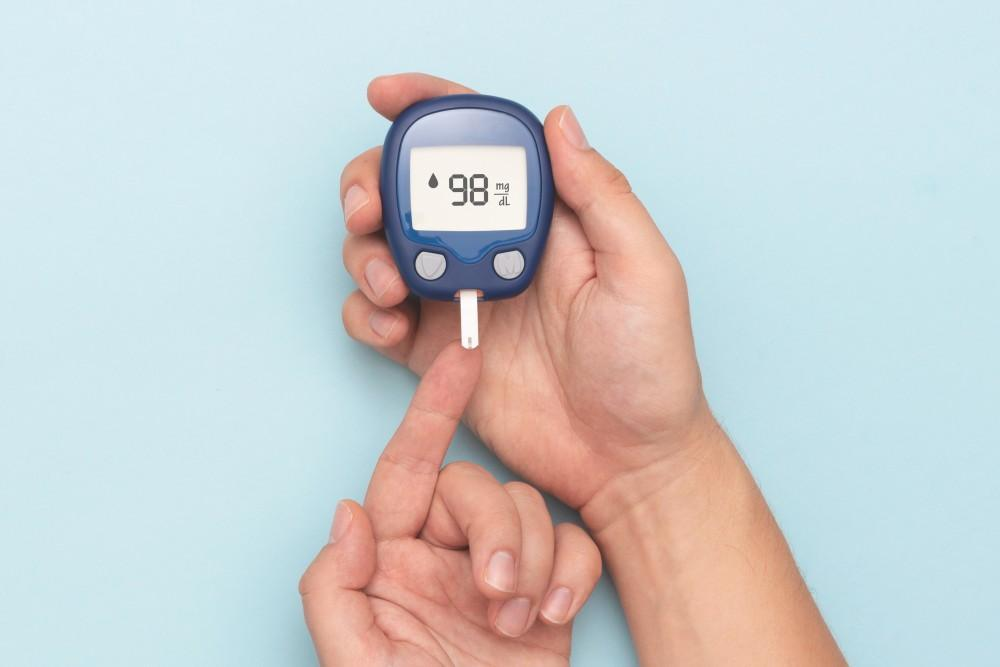

# ***Latar Belakang***

Diabetes adalah penyakit kronis yang berdampak besar pada kesehatan masyarakat global. Deteksi dini diabetes sangat penting untuk mencegah komplikasi serius seperti penyakit jantung, gagal ginjal, dan kebutaan. Sayangnya, banyak kasus diabetes tidak terdeteksi hingga gejala sudah parah. Oleh karena itu, dibutuhkan sebuah sistem yang mampu memprediksi kemungkinan seseorang menderita diabetes berdasarkan data medis secara cepat dan akurat.

# ***Business Understanding***

Peningkatan jumlah penderita diabetes setiap tahunnya memberikan beban besar bagi sistem kesehatan. Rumah sakit dan klinik membutuhkan alat bantu diagnosis yang dapat membantu dokter dalam mengidentifikasi pasien berisiko tinggi secara efisien, terutama di daerah dengan keterbatasan tenaga medis.

Dengan adanya sistem prediktif berbasis machine learning, diharapkan:

* Proses skrining lebih cepat

* Intervensi bisa dilakukan lebih awal

* Efisiensi dalam alokasi sumber daya medis

# ***Problem Statement***

Bagaimana cara membangun model machine learning yang dapat memprediksi kemungkinan seseorang mengidap diabetes berdasarkan fitur-fitur medis seperti kadar glukosa, tekanan darah, dan indeks massa tubuh?

# ***Goals***


* Membangun model klasifikasi untuk memprediksi Outcome (1: menderita diabetes, 0: tidak)

* Mengevaluasi performa model dengan metrik yang sesuai

* Mengidentifikasi fitur-fitur yang paling berpengaruh terhadap prediksi



# ***Solution Statement***


Solusi yang diusulkan:

* Menggunakan pendekatan supervised classification

* Model baseline: Logistic Regression

* Model lanjutan: Random Forest, dan jika diperlukan, XGBoost

* Validasi model dengan train-test split dan metrik klasifikasi seperti akurasi, F1-score, dan confusion matrix

# ***Evaluation Metric***


Model akan dievaluasi menggunakan metrik:

* Accuracy: seberapa banyak prediksi yang benar dari total prediksi

* Precision & Recall: penting untuk kasus medis (minimalkan false negative)

* F1-Score: harmonic mean dari precision dan recall

* Confusion Matrix: melihat distribusi error klasifikasi

# ***Data Understanding***

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut

## ***Data Source Understanding***

| Jenis       | Keterangan                                                                 |
|-------------|-----------------------------------------------------------------------------|
| Title       | Diabetes Dataset                                                            |
| Source      | https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data      |
| Owner       | Akshay Dattatray Khare                                                     |
| License     | CC0: Public Domain              |
| Visibility  | Public                                                                     |
| Tags        | Health,Tabular, Diabetes, Data Visualization                    |
| Usability   | 10.00                                   |


# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Dataset

In [2]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"acidddnflll","key":"027b951e75f53b4d25681f0cf1d15527"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Import dataset yang di download dari Kaggle

In [5]:
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Hasil dari download tadi berupa ZIP makadari itu kita perlu melakukan unzip supaya dataset dapat digunakan

In [6]:
df = pd.read_csv('diabetes.csv')

# Exploratory Data Analysis (EDA)

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.shape

(768, 9)

## ***Deskripsi Variable***

| Jenis                    | Keterangan                                                                 |
|--------------------------|----------------------------------------------------------------------------|
| Pregnancies              | Jumlah kehamilan yang pernah dialami                                       |
| Glucose                  | Kadar glukosa dalam darah                                                 |
| BloodPressure            | Tekanan darah                                                      |
| SkinThickness            | Ketebalan lipatan kulit                                               |
| Insulin                  | Kadar insulin dalam darah                                        |
| BMI                      | Indeks massa tubuh                                                |
| DiabetesPedigreeFunction| Riwayat genetik diabetes                                 |
| Age                      | Usia pasien                                                        |
| Outcome                  | Hasil diagnosa (0 = Tidak Diabetes, 1 = Diabetes)                         |


Setelah dilakukan pengeceka menggunakn `df.info()` Datset berisi 9 kolom dengan 768 baris dengan rincian seperti berikut
* Terdapat 7 kolom bertipe integer
* Terdapat 2 kolom bertipe float

In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Tidak memiliki missing value

In [11]:
cols_with_zero_as_missing = ['Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'BMI']

for col in cols_with_zero_as_missing:
    missing_count = (df[col] == 0).sum()
    print(f'Kolom {col} memiliki {missing_count} data dengan nilai 0 yang perlu diimputasi')

Kolom Glucose memiliki 5 data dengan nilai 0 yang perlu diimputasi
Kolom Insulin memiliki 374 data dengan nilai 0 yang perlu diimputasi
Kolom SkinThickness memiliki 227 data dengan nilai 0 yang perlu diimputasi
Kolom BloodPressure memiliki 35 data dengan nilai 0 yang perlu diimputasi
Kolom BMI memiliki 11 data dengan nilai 0 yang perlu diimputasi


Walaupun tidak terdeteksi missing value tapi perlu di cek ulang di beberapa kolom ada yang bernilai 0, pada kolom `'Glucose', 'Insulin', 'SkinThickness', 'BloodPressure', 'BMI'` terdapat nilai 0 yang mana dalam kondisi medis ini sangat tidak mungkin, makadari itu harus diimputasi terlebih dahulu

In [12]:
for col in cols_with_zero_as_missing:
    median_val = df[df[col] != 0][col].median()
    df.loc[df[col] == 0, col] = median_val

# Cek ulang apakah sudah tidak ada nilai 0
for col in cols_with_zero_as_missing:
    print(f"Jumlah nilai 0 di kolom {col}: {(df[col] == 0).sum()}")

Jumlah nilai 0 di kolom Glucose: 0
Jumlah nilai 0 di kolom Insulin: 0
Jumlah nilai 0 di kolom SkinThickness: 0
Jumlah nilai 0 di kolom BloodPressure: 0
Jumlah nilai 0 di kolom BMI: 0


Setelah diimputasi menggunakan median, kini sudah tidak ada lagi nilai 0

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

In [14]:
df.duplicated().sum()

np.int64(0)

Tidak ada data yang terduplikasi

# Menangani Outlier

In [15]:
def cap_outliers_iqr(dataframe, features):
    df_capped = dataframe.copy()
    for feature in features:
        Q1 = df_capped[feature].quantile(0.25)
        Q3 = df_capped[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_capped[feature] = df_capped[feature].clip(lower=lower_bound, upper=upper_bound)

    return df_capped

fitur_numerik = df.drop(columns='Outcome').columns
df_capped = cap_outliers_iqr(df, fitur_numerik)

print(f"Sebelum capping: {df.shape[0]} baris")
print(f"Sesudah capping: {df_capped.shape[0]} baris")

Sebelum capping: 768 baris
Sesudah capping: 768 baris


# EDA Univariate

## **Distrbusi numerik**

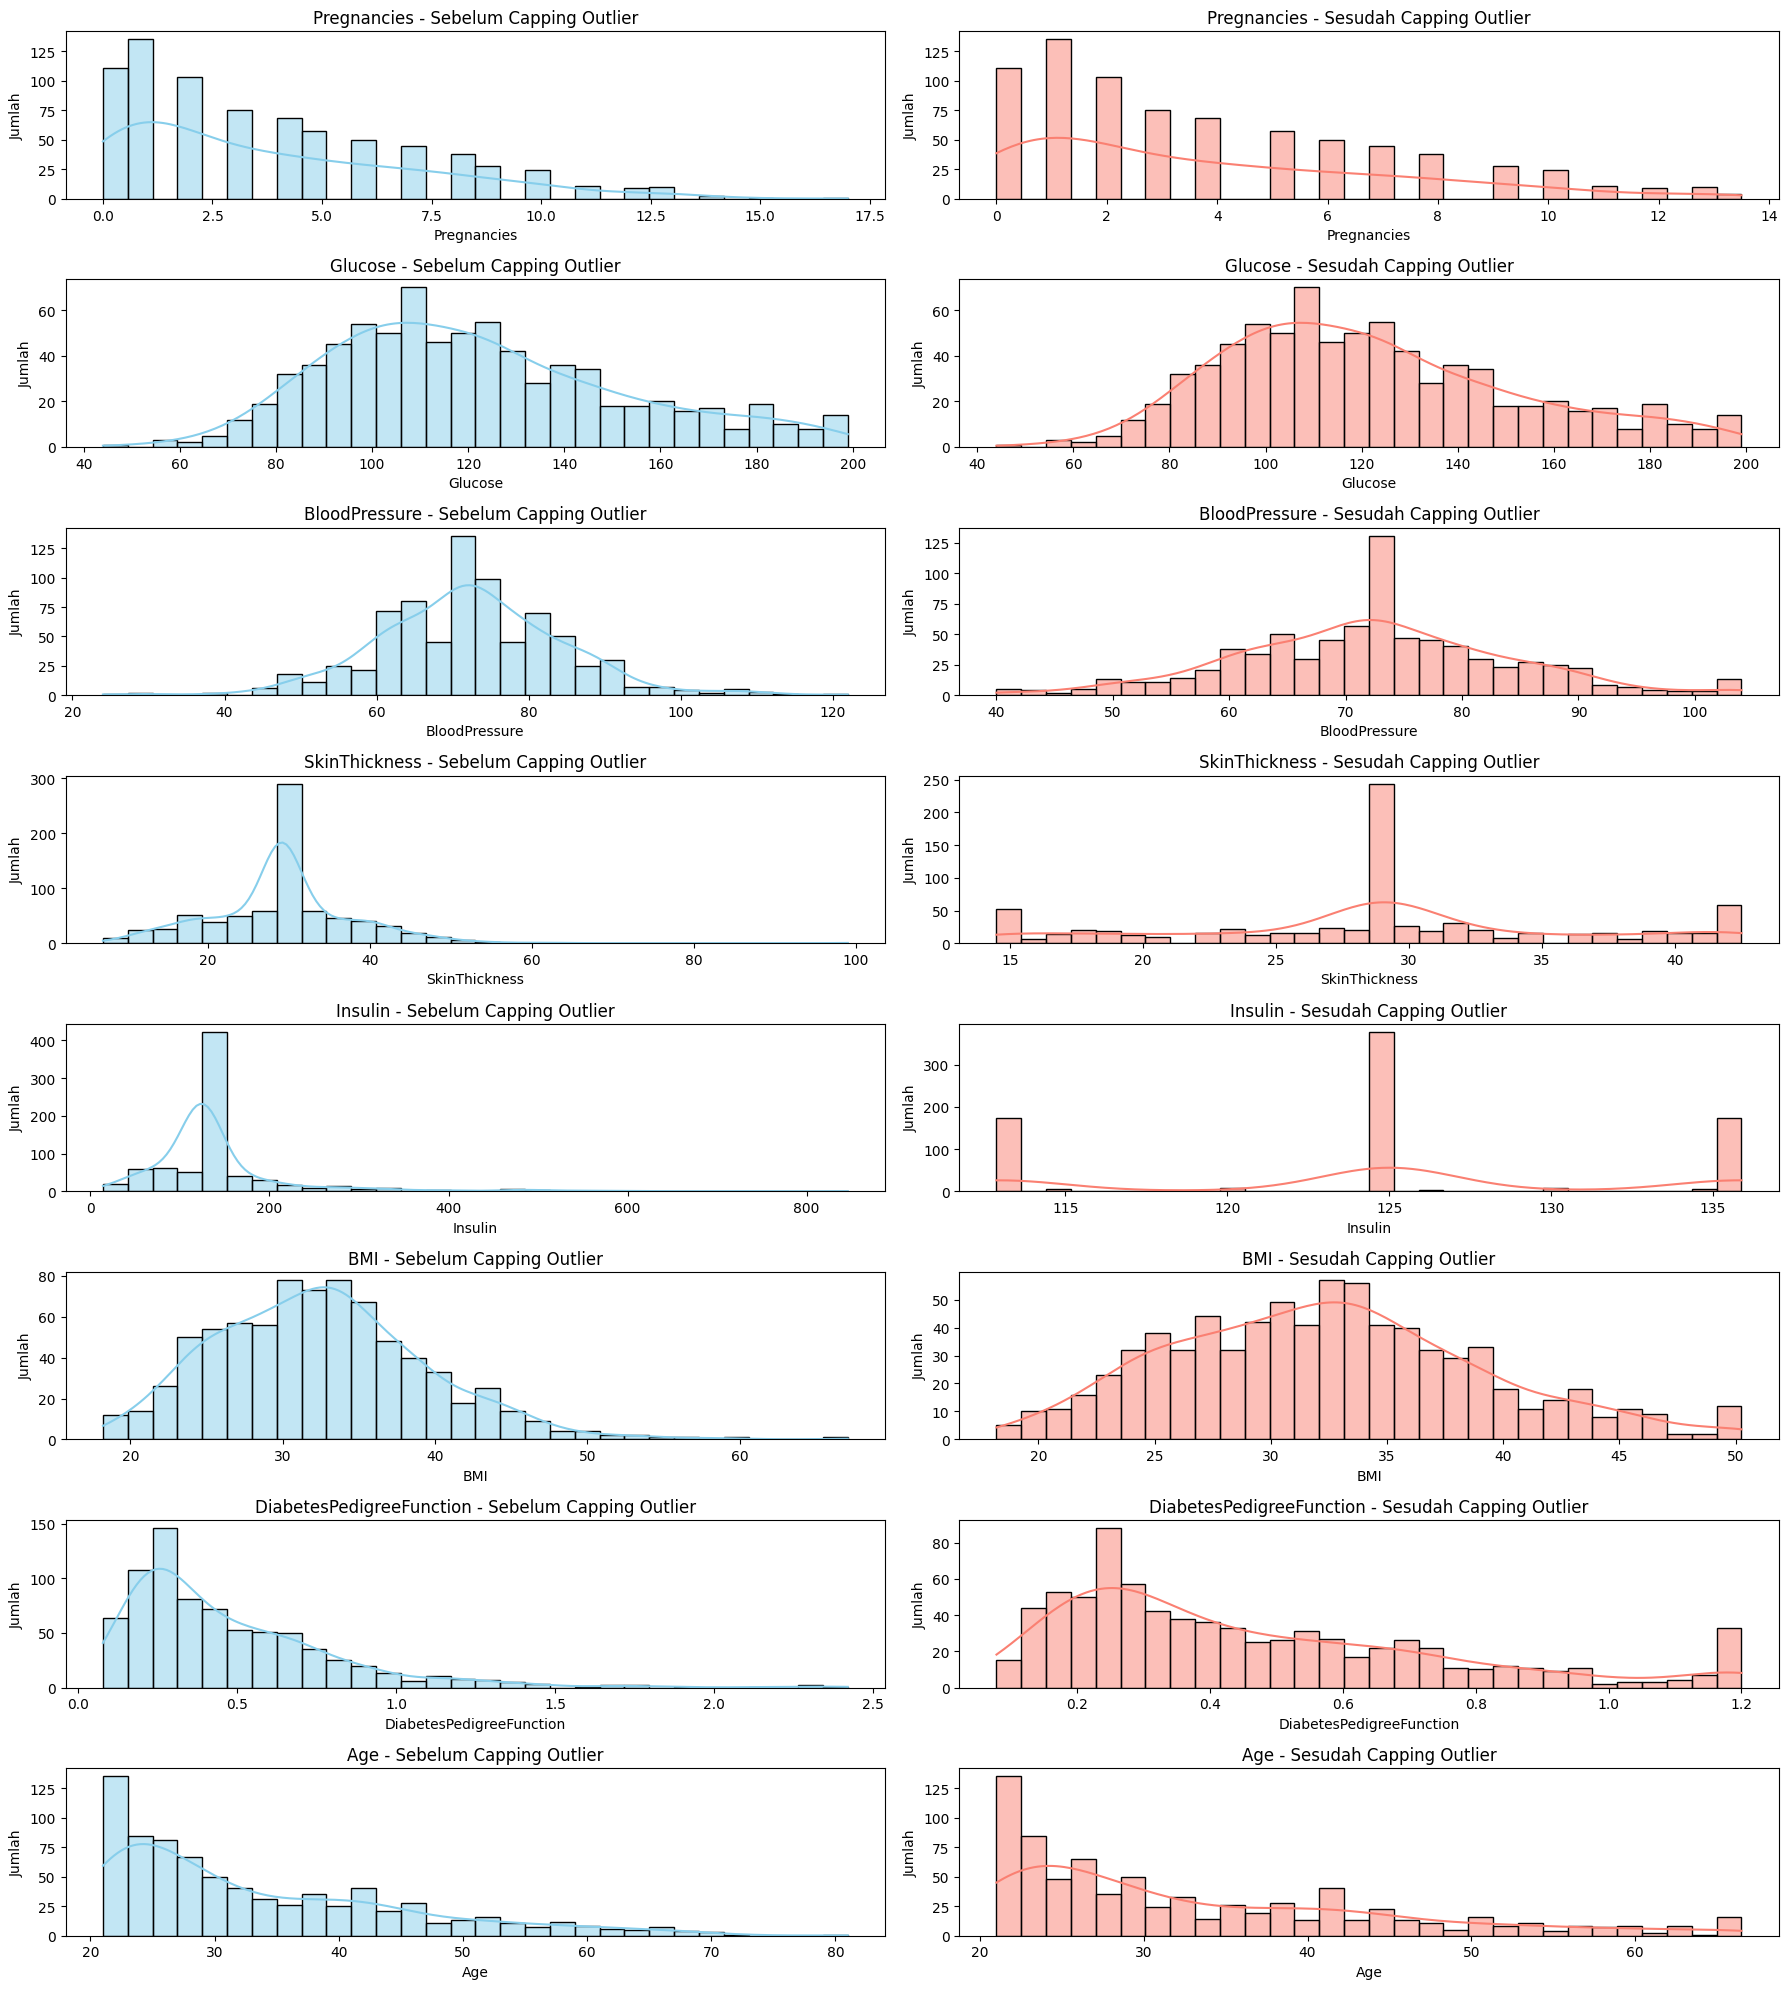

In [16]:
plt.figure(figsize=(18, 20))

for i, kolom in enumerate(fitur_numerik, 1):
    # Sebelum capping (original)
    plt.subplot(len(fitur_numerik), 2, 2*i - 1)
    sns.histplot(df[kolom], kde=True, bins=30, color='skyblue')
    plt.title(f'{kolom} - Sebelum Capping Outlier')
    plt.xlabel(kolom)
    plt.ylabel('Jumlah')

    # Sesudah capping
    plt.subplot(len(fitur_numerik), 2, 2*i)
    sns.histplot(df_capped[kolom], kde=True, bins=30, color='salmon')
    plt.title(f'{kolom} - Sesudah Capping Outlier')
    plt.xlabel(kolom)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

## **Outlier pada kolom numerik**

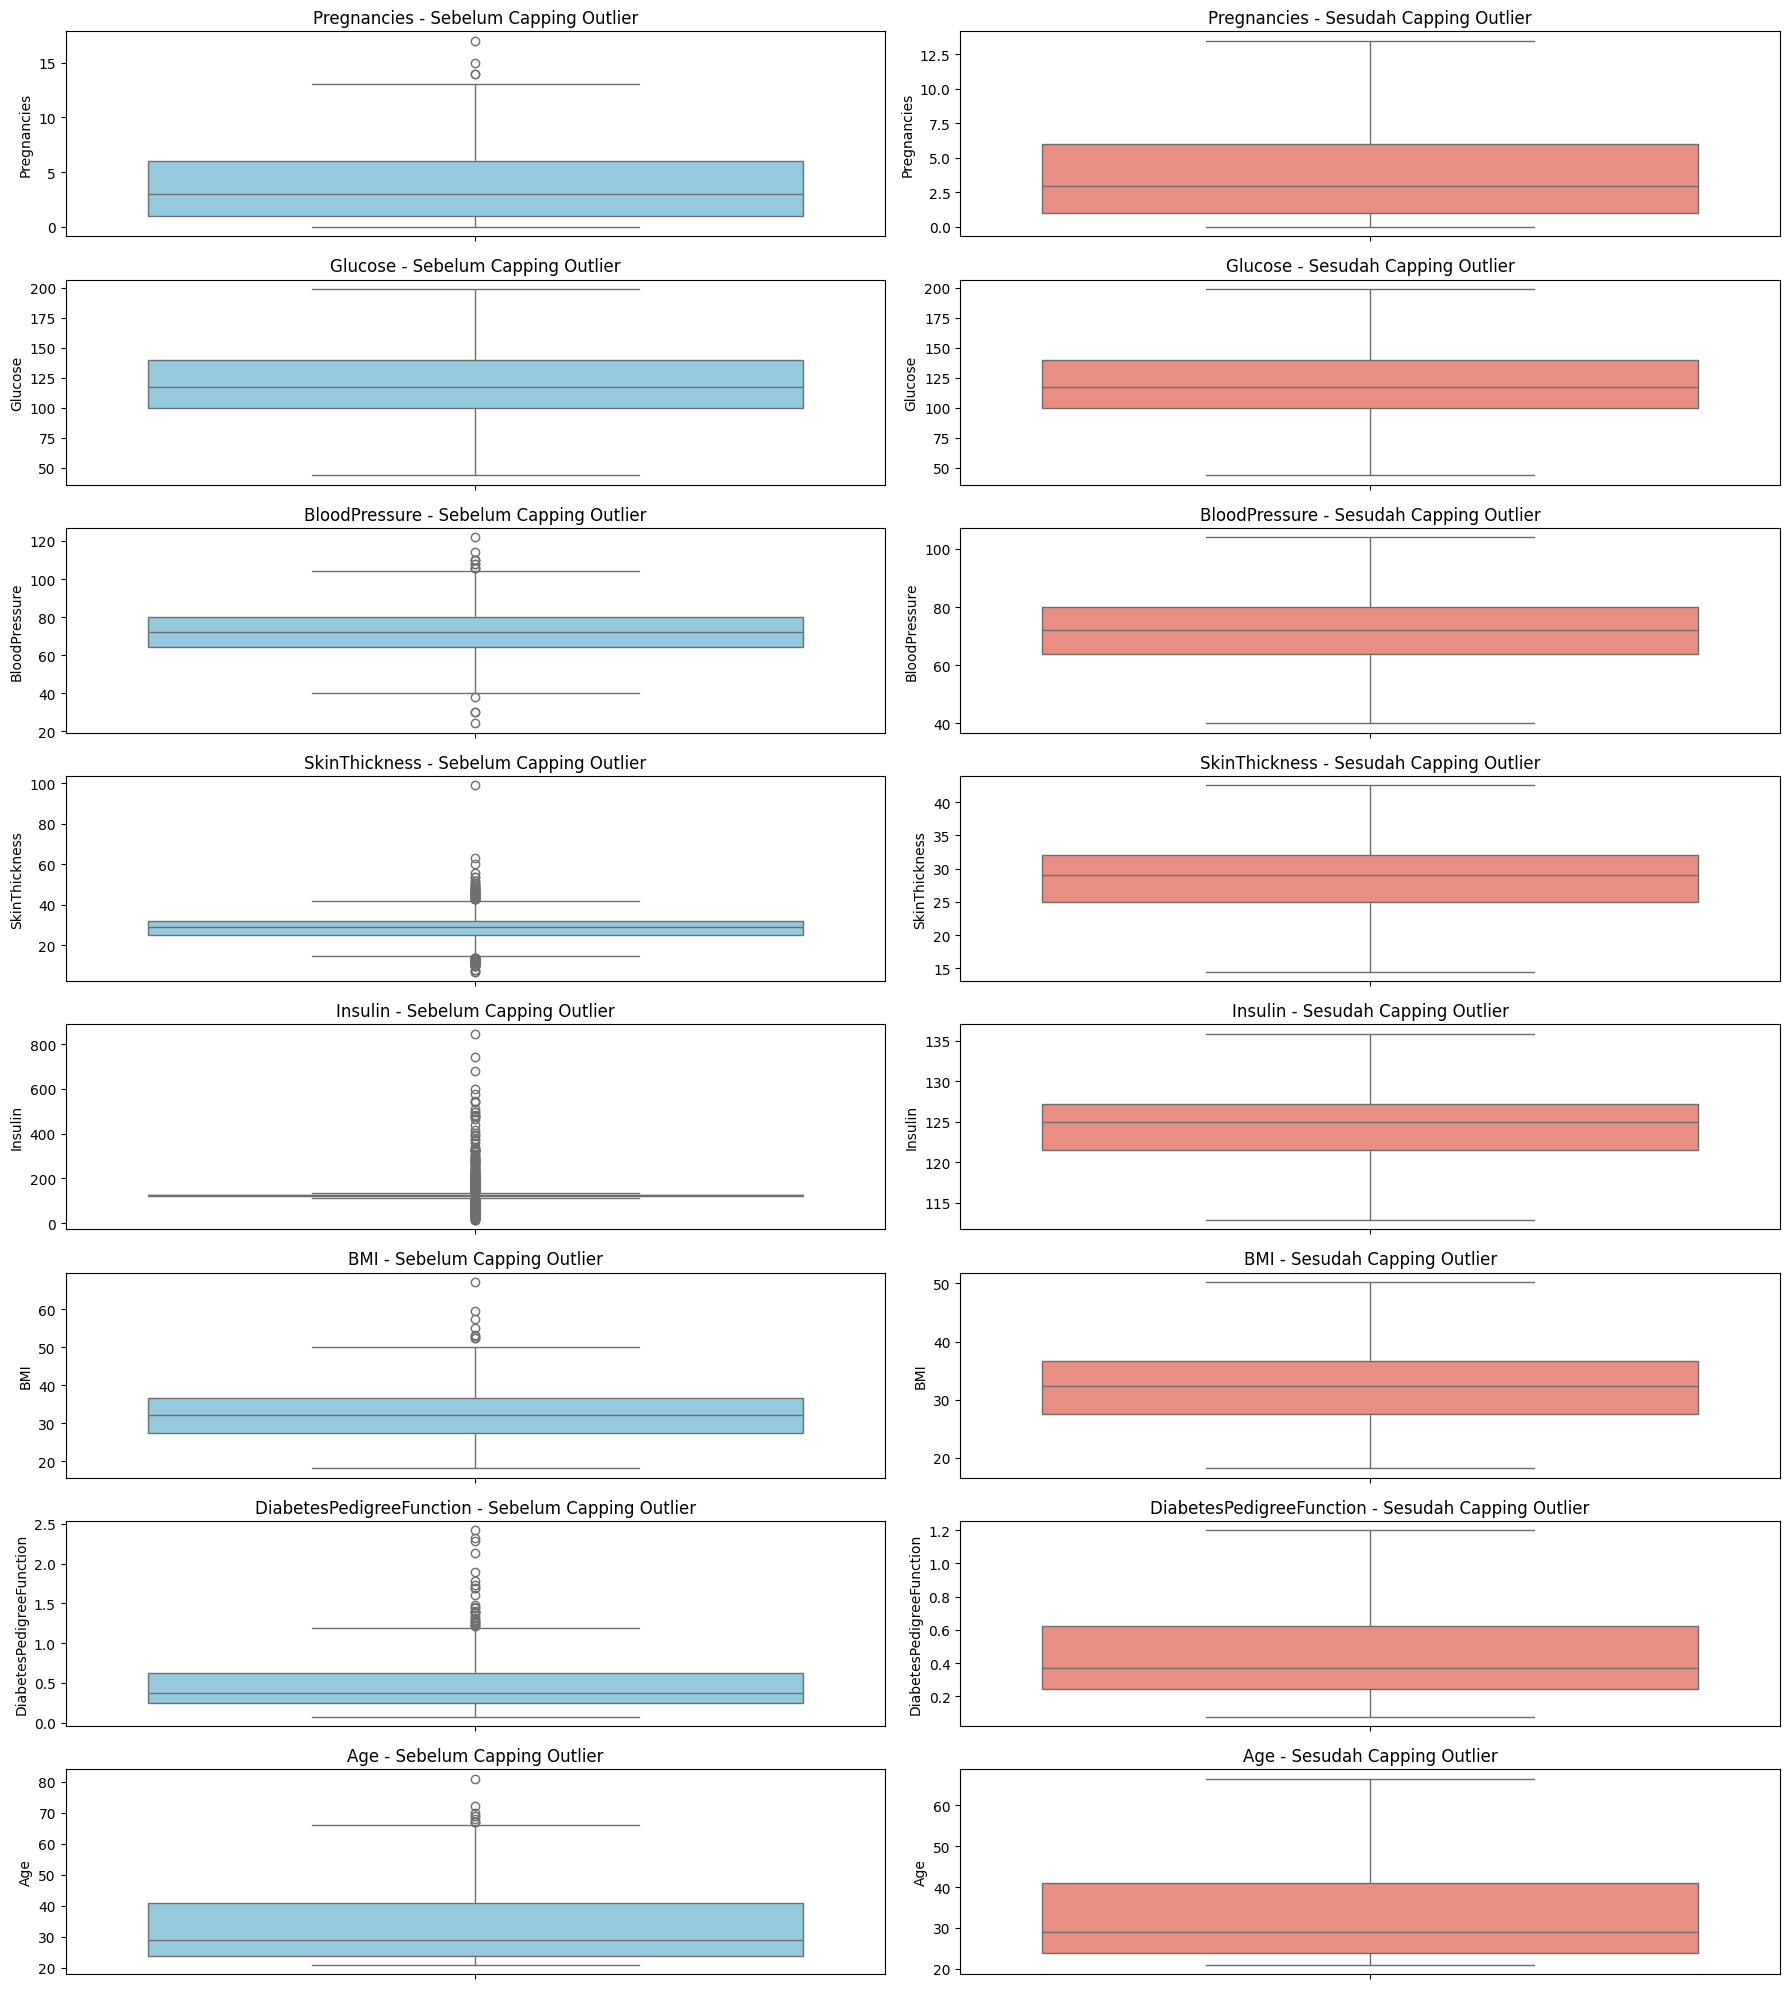

In [17]:
plt.figure(figsize=(18, 20))

for i, kolom in enumerate(fitur_numerik, 1):
    # Sebelum capping (original)
    plt.subplot(len(fitur_numerik), 2, 2*i - 1)
    sns.boxplot(y=df[kolom], color='skyblue')
    plt.title(f'{kolom} - Sebelum Capping Outlier')

    # Sesudah capping
    plt.subplot(len(fitur_numerik), 2, 2*i)
    sns.boxplot(y=df_capped[kolom], color='salmon')
    plt.title(f'{kolom} - Sesudah Capping Outlier')

plt.tight_layout()
plt.show()

## **Distribusi target (outcome)**

<ipython-input-18-c1e15dacda2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


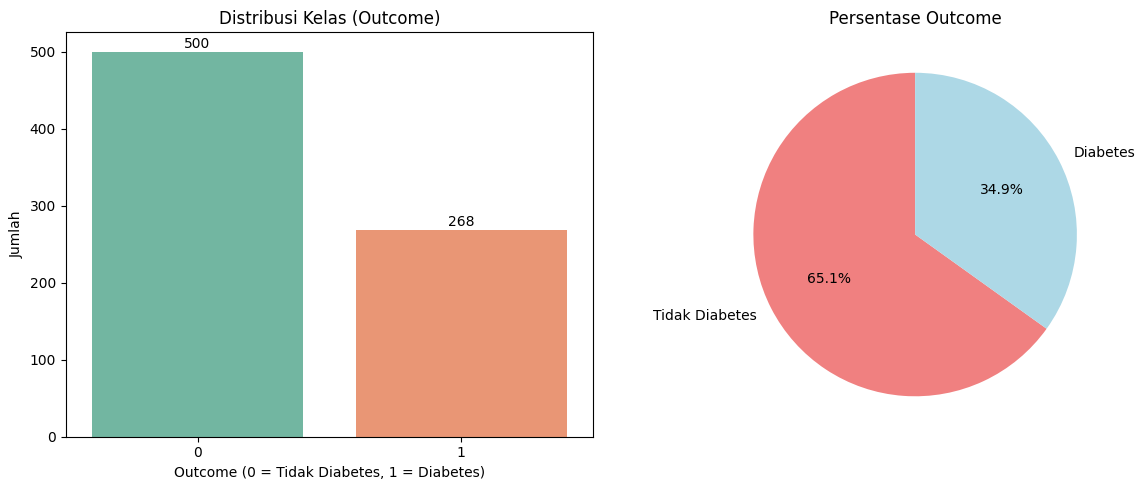

In [18]:
plt.figure(figsize=(12, 5))

# Bar Chart
plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribusi Kelas (Outcome)')
plt.xlabel('Outcome (0 = Tidak Diabetes, 1 = Diabetes)')
plt.ylabel('Jumlah')
for index, value in enumerate(df['Outcome'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center')

# Pie Chart
plt.subplot(1, 2, 2)
df['Outcome'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightblue'],
    labels=['Tidak Diabetes', 'Diabetes']
)
plt.ylabel('')
plt.title('Persentase Outcome')

plt.tight_layout()
plt.show()

## Sample handling

In [19]:
print(f"Jumlah data setelah capping: {df_capped.shape[0]}")

feature = 'Outcome'
count = df_capped[feature].value_counts()
percent = 100 * df_capped[feature].value_counts(normalize=True)

df_outcome = pd.DataFrame({
    'Jumlah sample': count,
    'Persentase (%)': percent.round(1)
})

print(df_outcome)
print("\nTotal Sample:", df_capped[feature].shape[0])

Jumlah data setelah capping: 768
         Jumlah sample  Persentase (%)
Outcome                               
0                  500            65.1
1                  268            34.9

Total Sample: 768


# **EDA Multivariate**

## **Korelasi antar fitur numerik**

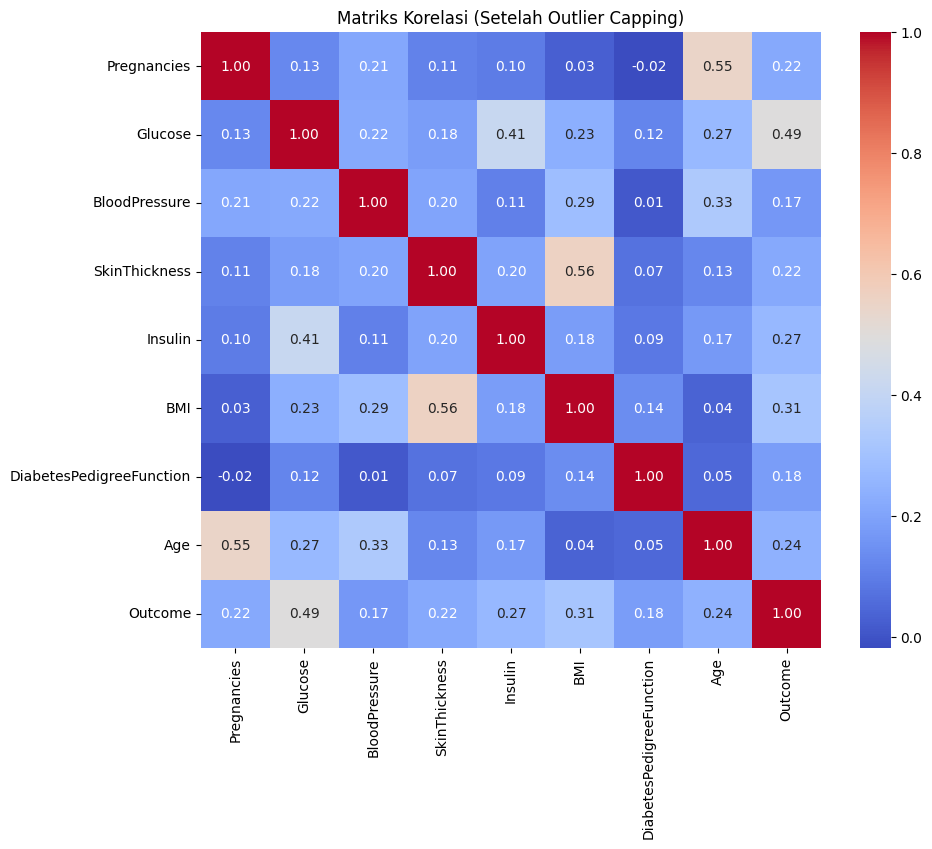

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_capped.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi (Setelah Outlier Capping)')
plt.show()

## **Scatterplot fitur penting dengan label Outcome**

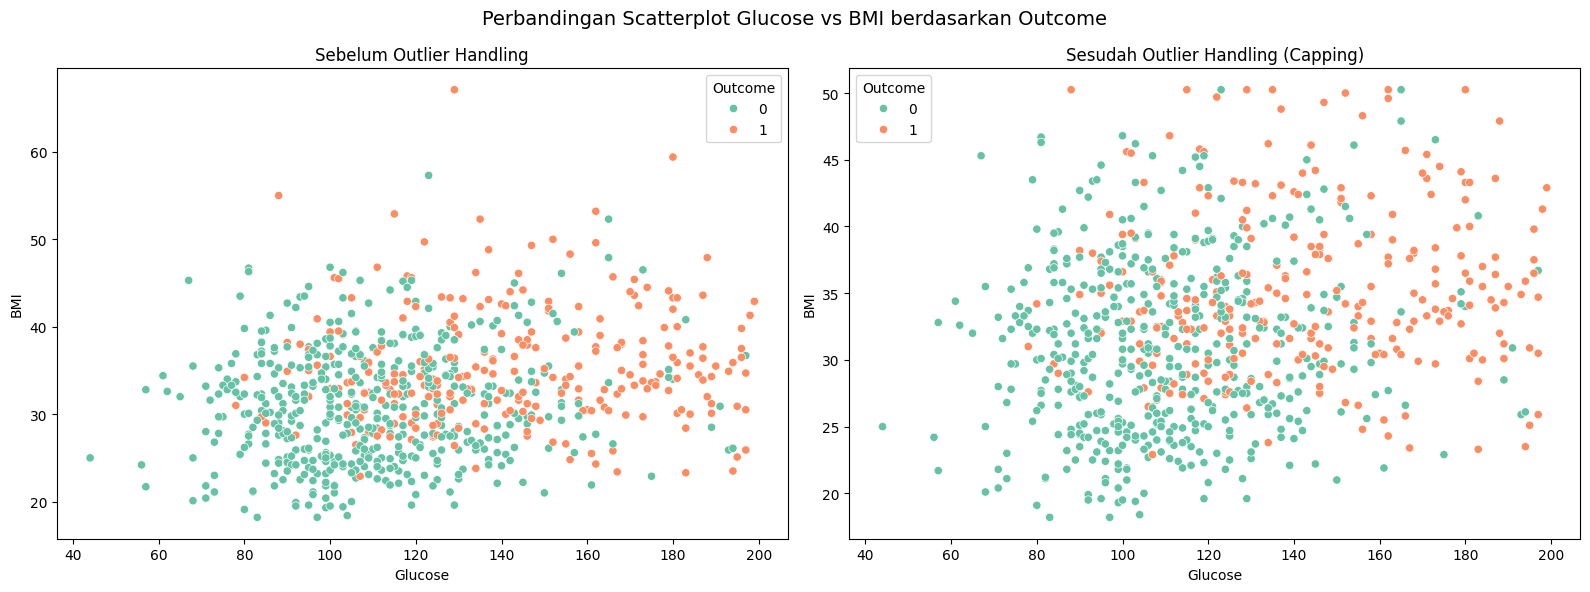

In [21]:
plt.figure(figsize=(16, 6))

# Scatterplot sebelum handling outlier
plt.subplot(1, 2, 1)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set2')
plt.title('Sebelum Outlier Handling')
plt.xlabel('Glucose')
plt.ylabel('BMI')

# Scatterplot sesudah handling outlier (capping)
plt.subplot(1, 2, 2)
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df_capped, palette='Set2')
plt.title('Sesudah Outlier Handling (Capping)')
plt.xlabel('Glucose')
plt.ylabel('BMI')

plt.suptitle('Perbandingan Scatterplot Glucose vs BMI berdasarkan Outcome', fontsize=14)
plt.tight_layout()
plt.show()

# Data Preparation

## Cek Skewnes

In [22]:
# Cek skewness
df_capped[fitur_numerik].skew().sort_values(ascending=False)

,0
Age,1.067170
DiabetesPedigreeFunction,1.024428
Pregnancies,0.853962
Glucose,0.535587
BMI,0.349882
BloodPressure,0.105665
SkinThickness,-0.057643
Insulin,-0.118221


## Pisah fitur dan target

In [23]:
X = df_capped.drop(columns=['Outcome'])
y = df_capped['Outcome']

## Scalling

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ubah ke DataFrame supaya kolomnya tetap rapi
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Splitting

In [25]:
# Split awal: Train (60%) dan Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.4, stratify=y, random_state=42
)

# Split Temp jadi Validation (20%) dan Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)


In [26]:
# SMOTE hanya di train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Sebelum SMOTE: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Setelah SMOTE: {dict(zip(*np.unique(y_train_res, return_counts=True)))}")

Sebelum SMOTE: {np.int64(0): np.int64(299), np.int64(1): np.int64(161)}
Setelah SMOTE: {np.int64(0): np.int64(299), np.int64(1): np.int64(299)}


# Build Model

In [27]:
lr = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0,
    solver='lbfgs'
)

lr.fit(X_train_res, y_train_res)


LogisticRegression(max_iter=1000, random_state=42)

In [28]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [29]:
svm = SVC(
    kernel='rbf',
    probability=True,
    random_state=42,
    C=1.0,
    gamma='scale'
)

svm.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=42)

# Eval

=== Logistic Regression ===
Accuracy : 0.7987012987012987
Precision: 0.676923076923077
Recall   : 0.8148148148148148
F1 Score : 0.7394957983193278

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       100
           1       0.68      0.81      0.74        54

    accuracy                           0.80       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.81      0.80      0.80       154



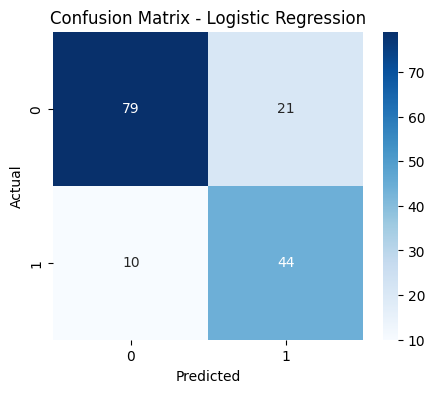

In [30]:
# logreg
y_pred_lr = lr.predict(X_val)

print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_val, y_pred_lr))
print("Precision:", precision_score(y_val, y_pred_lr))
print("Recall   :", recall_score(y_val, y_pred_lr))
print("F1 Score :", f1_score(y_val, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

cm = confusion_matrix(y_val, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

=== Random Forest ===
Accuracy : 0.7337662337662337
Precision: 0.6031746031746031
Recall   : 0.7037037037037037
F1 Score : 0.6495726495726496

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



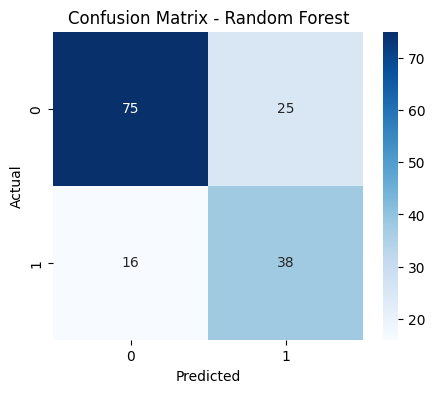

In [31]:
# Random Forest
y_pred_rf = rf.predict(X_val)

print("=== Random Forest ===")
print("Accuracy :", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall   :", recall_score(y_val, y_pred_rf))
print("F1 Score :", f1_score(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

cm = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

=== Support Vector Machine ===
Accuracy : 0.7597402597402597
Precision: 0.639344262295082
Recall   : 0.7222222222222222
F1 Score : 0.6782608695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



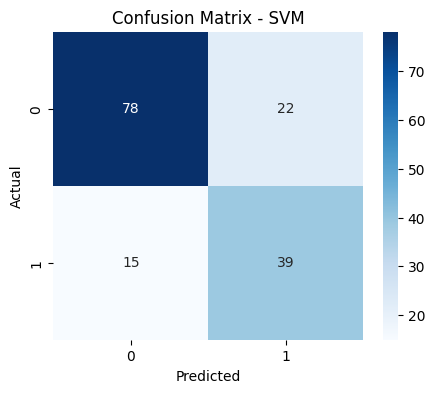

In [32]:
# svm
y_pred_svm = svm.predict(X_val)

print("=== Support Vector Machine ===")
print("Accuracy :", accuracy_score(y_val, y_pred_svm))
print("Precision:", precision_score(y_val, y_pred_svm))
print("Recall   :", recall_score(y_val, y_pred_svm))
print("F1 Score :", f1_score(y_val, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))

cm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()